In [86]:
import ROOT as r
import math
import numpy as np
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)

In [2]:
filewindow = r.TFile("./FourierWiggle_output_Window.root")
filenowindow = r.TFile("./FourierWiggle_output_noWindow.root")

In [3]:
#filewindow.ls()
filewindow.cd()

True

In [4]:
def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in r.gDirectory.GetListOfKeys()]
r.TFile.GetKeyNames = GetKeyNames

keyList = filewindow.GetKeyNames("")
print ("\nKeys in file:", keyList)


Keys in file: ['time0_window', 'time1_window', 'time2_window', 'time3_window', 'time4_window', 'time5_window', 'time6_window', 'time7_window', 'time8_window', 'time9_window', 'time10_window', 'time11_window', 'time12_window', 'time13_window', 'time14_window', 'time15_window', 'time16_window', 'time17_window', 'time18_window', 'time19_window', 'time20_window', 'time21_window', 'time22_window', 'time23_window', 'time24_window', 'time25_window', 'time26_window', 'time27_window', 'time28_window', 'time29_window', 'time30_window', 'time31_window', 'time32_window', 'time33_window', 'time34_window', 'time35_window', 'time36_window', 'time37_window', 'time38_window', 'time39_window', 'time40_window', 'time41_window', 'time42_window', 'time43_window', 'time44_window', 'time45_window', 'time46_window', 'time47_window']


In [29]:
def peak_fit(x, p):
    return p[0]*r.TMath.Exp(-0.5*((x[0]-p[1])/p[2])*((x[0]-p[1])/p[2])) + p[3] + p[4]*r.TMath.Exp(-p[5]*x[0])
def peak_fit_simple(x, p):
    return p[0]*r.TMath.Exp(-0.5*((x[0]-p[1])/p[2])*((x[0]-p[1])/p[2])) + p[3]
def peak_fit_bw(x, p):
    return p[0]*r.TMath.BreitWigner(x[0],p[1],p[2]) + p[3]

In [30]:
'''
func = r.TF1("func", peak_fit_simple, .22,.25,4)
func.SetParNames('A','Mean','#sigma','+ C')
func.SetParameters(.0001,.23,.1,0)
func.SetLineColor(2)
func.SetNpx(1000)
'''

'\nfunc = r.TF1("func", peak_fit_simple, .22,.25,4)\nfunc.SetParNames(\'A\',\'Mean\',\'#sigma\',\'+ C\')\nfunc.SetParameters(.0001,.23,.1,0)\nfunc.SetLineColor(2)\nfunc.SetNpx(1000)\n'

In [119]:
func = r.TF1("func", peak_fit_bw, .22,.27,4)
func.SetParNames('A','Mean','#gamma','+ C')
func.SetParameters(.0001,.23,.1,0)
func.SetParLimits(1,.22,.25)
func.SetLineColor(2)
func.SetNpx(1000)

In [52]:
'''
func = r.TF1("func", peak_fit, .22,.26,6)
func.SetParNames('A','Mean','#sigma','+ C', '+ D','e^(-E*x)' )
func.SetParameters(.0001,.23,.1,0,0,-1)
func.SetParLimits(0,0,1)
func.SetParLimits(1,.22,.25)
func.SetLineColor(2)
func.SetNpx(1000)
'''

'\nfunc = r.TF1("func", peak_fit, .22,.26,6)\nfunc.SetParNames(\'A\',\'Mean\',\'#sigma\',\'+ C\', \'+ D\',\'e^(-E*x)\' )\nfunc.SetParameters(.0001,.23,.1,0,0,-1)\nfunc.SetParLimits(0,0,1)\nfunc.SetParLimits(1,.22,.25)\nfunc.SetLineColor(2)\nfunc.SetNpx(1000)\n'

In [53]:
meanlist_noWindow = []
stdlist_noWindow = []
meanlist_window = []
stdlist_window = []

0.22996146109727061 0.008012617763448193
0.2299880100003707 0.008082048428434838
0.22998424613274093 0.00814796578822806
0.22995068105944708 0.008207661374599398
0.2298928550876707 0.008233215249231193
0.22982887212755151 0.00823031874297206
0.22976901777571418 0.008201865336091102
0.22972125730741844 0.00814923291269433
0.22968647418513094 0.008089106094643375
0.22966884455220565 0.008023453969547165
0.2296730341754936 0.007961241716677864
0.22969627510060447 0.007908889304408445
0.22973987841890098 0.007874478141607064
0.2298007807127535 0.007840335430304005
0.2298685219002404 0.007842301252158457
0.22993651471043294 0.007881244196535617
0.22998987307222699 0.007954064648249812
0.2300146184791582 0.008037460177975408
0.23000562042792025 0.008103997722761339
0.2299680867944396 0.008150186759878983
0.2299056409509996 0.008173751851864294
0.2298255488216148 0.008166752225165774
0.2297545909209949 0.008132430776330773
0.22969878508963174 0.008076409970302387
0.22966554838297842 0.0080107

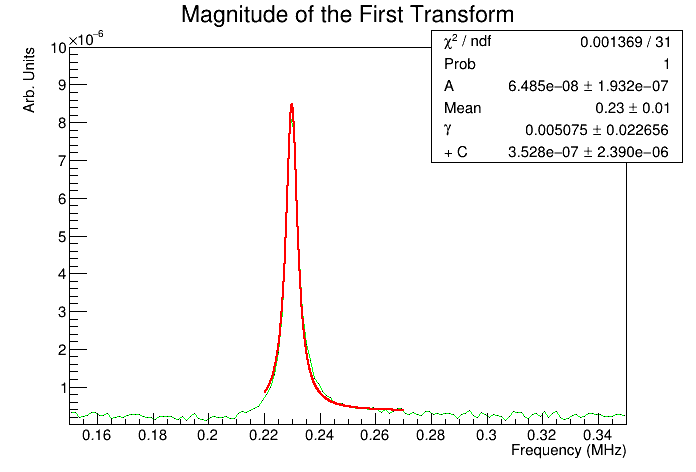

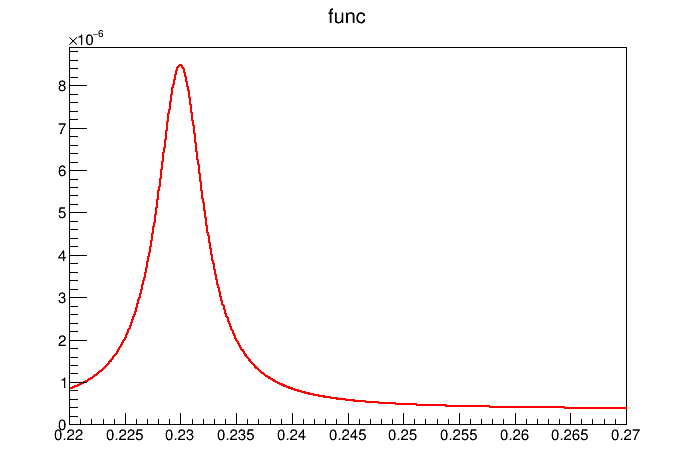

In [55]:
#for i in range(0,1):
for i in range(0,len(keyList)):
    ding = r.TH1D()
    filewindow.GetObject(keyList[i], ding)
    c = r.TCanvas()
#    c.SetLogy()
    ding.Draw("HIST P0 L")
    ding.GetXaxis().SetRangeUser(.15,.35)
    ding.GetYaxis().SetRangeUser(0.000000001,.00001)
    ding.Fit("func","REMB")
    func.Draw("SAME")
    c.Draw()
    c2 = r.TCanvas()
    func.Draw()
    meanlist_window.append(func.GetParameter(1))
    stdlist_window.append(func.GetParError(1))
    print(func.GetParameter(1), func.GetParError(1))
    c2.Draw()

In [56]:
print(meanlist_window)

[0.22996142670161443, 0.22996146109727061, 0.2299880100003707, 0.22998424613274093, 0.22995068105944708, 0.2298928550876707, 0.22982887212755151, 0.22976901777571418, 0.22972125730741844, 0.22968647418513094, 0.22966884455220565, 0.2296730341754936, 0.22969627510060447, 0.22973987841890098, 0.2298007807127535, 0.2298685219002404, 0.22993651471043294, 0.22998987307222699, 0.2300146184791582, 0.23000562042792025, 0.2299680867944396, 0.2299056409509996, 0.2298255488216148, 0.2297545909209949, 0.22969878508963174, 0.22966554838297842, 0.2296457690213827, 0.22965235408444845, 0.22968354230531102, 0.22973305094453692, 0.22980650208048992, 0.229884875376238, 0.22995669279295985, 0.23001355146970165, 0.23003909714324428, 0.23002241364435083, 0.22997684636013163, 0.22990048158668108, 0.22981603864919298, 0.22974207075910244, 0.22968482017655567, 0.22964499558958434, 0.22963046781078195, 0.22964368726491957, 0.22968050277189972, 0.22974031878830026, 0.22982218381549668, 0.22990275375960953, 0.22

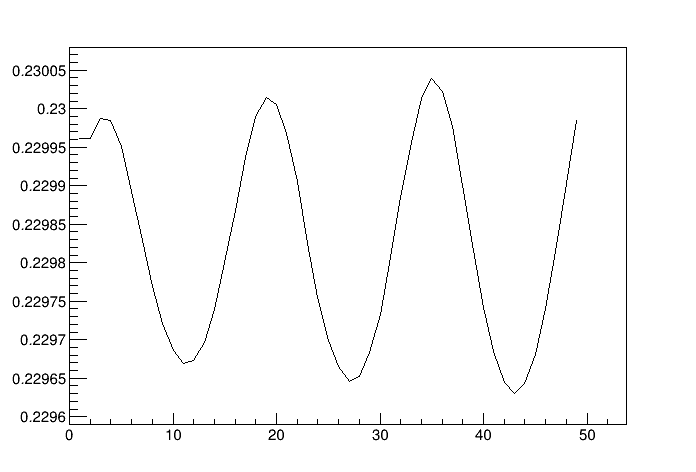

In [57]:
gr = r.TGraphErrors()

for i in range(0,len(meanlist_window)):
#    print(i, meanlist_window[i])
    gr.SetPoint(i,i+1,meanlist_window[i])
#    gr.SetPointError(i,0,stdlist_window[i])
    
c = r.TCanvas()
gr.Draw()
c.Draw()

In [58]:
filenowindow.cd()
keyListNoWindow = filenowindow.GetKeyNames("")
print ("\nKeys in file:", keyListNoWindow)


Keys in file: ['time0_noWindow', 'time1_noWindow', 'time2_noWindow', 'time3_noWindow', 'time4_noWindow', 'time5_noWindow', 'time6_noWindow', 'time7_noWindow', 'time8_noWindow', 'time9_noWindow', 'time10_noWindow', 'time11_noWindow', 'time12_noWindow', 'time13_noWindow', 'time14_noWindow', 'time15_noWindow', 'time16_noWindow', 'time17_noWindow', 'time18_noWindow', 'time19_noWindow', 'time20_noWindow', 'time21_noWindow', 'time22_noWindow', 'time23_noWindow', 'time24_noWindow', 'time25_noWindow', 'time26_noWindow', 'time27_noWindow', 'time28_noWindow', 'time29_noWindow', 'time30_noWindow', 'time31_noWindow', 'time32_noWindow', 'time33_noWindow', 'time34_noWindow', 'time35_noWindow', 'time36_noWindow', 'time37_noWindow', 'time38_noWindow', 'time39_noWindow', 'time40_noWindow', 'time41_noWindow', 'time42_noWindow', 'time43_noWindow', 'time44_noWindow', 'time45_noWindow', 'time46_noWindow', 'time47_noWindow']


0.23048437524480841 0.0064235583808202185
0.2306413183218768 0.0066268796041509676
0.23068205033436842 0.006776156072168846
0.23055337791503974 0.0067927116514166636
0.23026320350191692 0.006711407210332476
0.22990577275852725 0.006636861883483253
0.2295623215406734 0.006587409114916912
0.22929759326330754 0.006528507704435693
0.2291350346428826 0.006459214637604946
0.22908344009622109 0.006431843816689986
0.22913913044094558 0.006331417174305423
0.2292746661575846 0.006234278535468138
0.22947821957618003 0.006164012148884429
0.2297205654977572 0.006131938452492547
0.22999277400796955 0.006160033779678192
0.23027297946527167 0.006275615307442098
0.2305127590835379 0.006470775631740047
0.23066080850278642 0.006685447315796705
0.23067764868708063 0.006816897879218076
0.23054881314696285 0.0068188244545766274
0.23027058250068458 0.0067282752267303625
0.2298852966121884 0.006641071747405386
0.22952823057152744 0.006586118783768524
0.22926381304325738 0.006522307633797436
0.2291203078818452

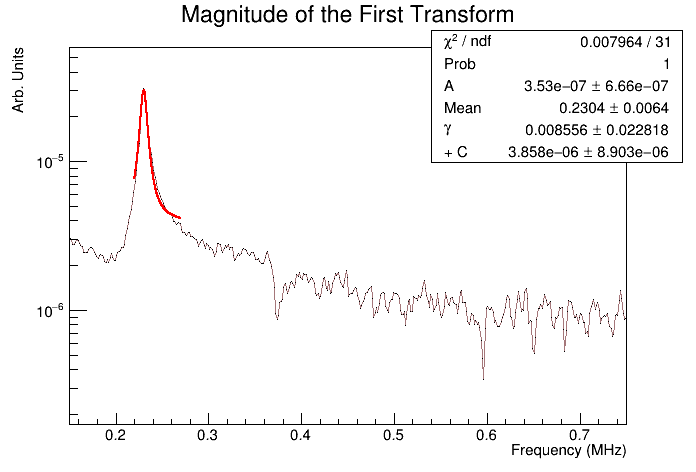

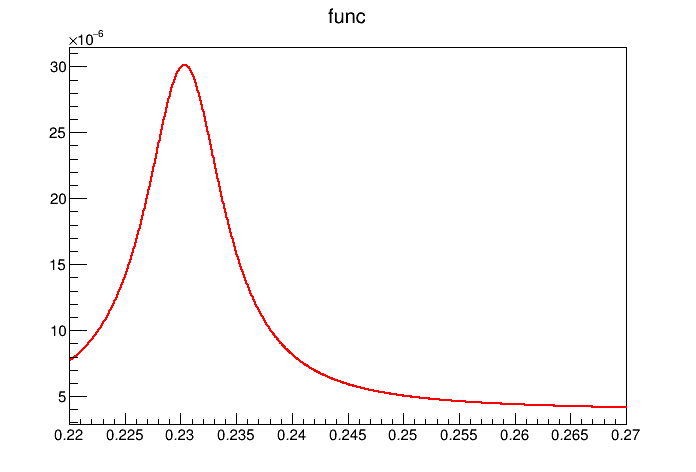

In [59]:
for i in range(0,len(keyListNoWindow)):
    ding = r.TH1D()
    filenowindow.GetObject(keyListNoWindow[i], ding)
    c = r.TCanvas()
    c.SetLogy()
    ding.Draw("HIST P0 L")
    ding.GetXaxis().SetRangeUser(.15,.75)
    ding.Fit("func","REM")
    func.Draw("SAME")
    c.Draw()
    c2 = r.TCanvas()
    func.Draw()
    meanlist_noWindow.append(func.GetParameter(1))
    stdlist_noWindow.append(func.GetParError(1))
    print(func.GetParameter(1), func.GetParError(1))
    c2.Draw()

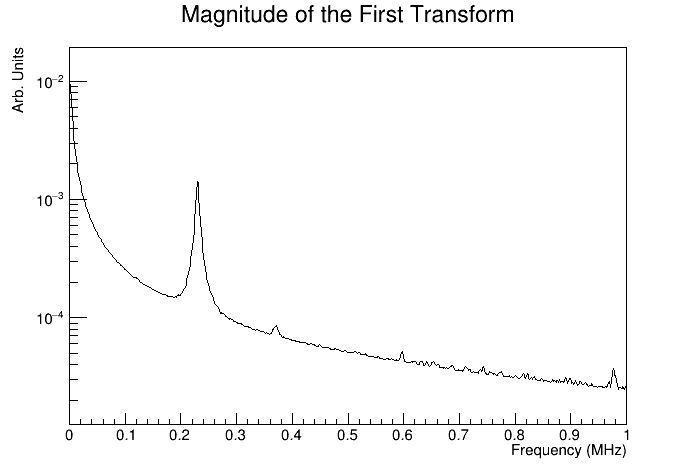

In [60]:
h = r.TH1D()
filenowindow.GetObject(keyListNoWindow[0], h)
for i in range(1,len(keyListNoWindow)):
    ding = r.TH1D()
    filenowindow.GetObject(keyListNoWindow[i], ding)
    h.Add(ding)
c = r.TCanvas()
c.SetLogy()
h.Draw("HIST P0 L")
h.GetXaxis().SetRangeUser(0,1)
c.Draw()

0.22986656553284715 0.0009462603471926678
 FCN=0.187625 FROM MINOS     STATUS=SUCCESSFUL     82 CALLS        2293 TOTAL
                     EDM=2.32136e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.80579e-05   4.53536e-06   1.84891e-07  -5.60853e+02
   2  Mean         2.29867e-01   9.46260e-04  -2.44355e-04   5.38788e-03
   3  #gamma       9.32342e-03   3.37018e-03   1.30665e-04  -6.75977e-01
   4  + C          1.12670e-04   5.26980e-05   5.26980e-05   1.22021e-01


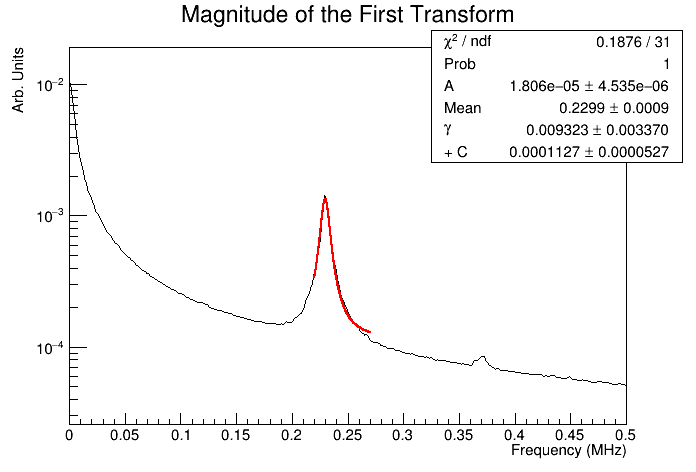

In [120]:
c = r.TCanvas()
c.SetLogy()
h.Draw("HIST P0 L")
h.GetXaxis().SetRangeUser(0,.5)
h.Fit("func","REM")
func.Draw("SAME")
c.Draw()

print(func.GetParameter(1), func.GetParError(1))

sum_mean = func.GetParameter(1)

In [62]:
outfile = r.TFile("output.root","RECREATE")
outfile.cd()
c.Write()
outfile.Close()

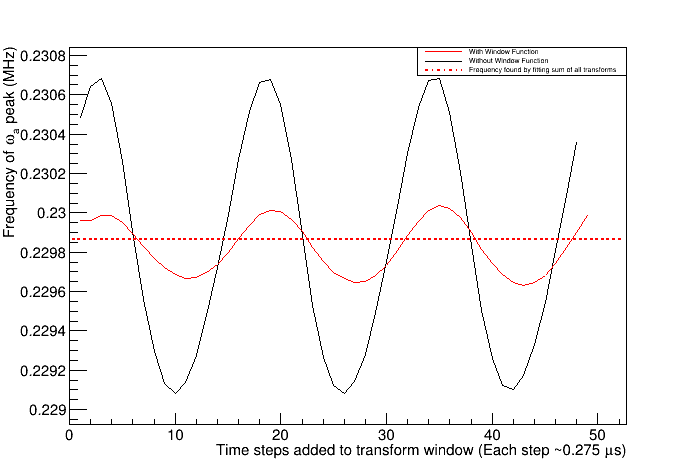

In [76]:
gr2 = r.TGraphErrors()

for i in range(0,len(meanlist_noWindow)):
#    print(i, meanlist_window[i])
    gr2.SetPoint(i,i+1,meanlist_noWindow[i])
#    gr2.SetPointError(i,0,stdlist_noWindow[i])
    
c = r.TCanvas()
gr2.GetXaxis().SetTitle("Time steps added to transform window (Each step ~0.275 #mus)")
gr2.GetYaxis().SetTitle("Frequency of #omega_{a} peak (MHz)")
gr2.GetYaxis().SetTitleOffset(1.5)
gr2.Draw()

gr.SetMarkerColor(2)
gr.SetLineColor(2)
gr.Draw("SAME")

meanfunc = r.TF1("meanfunc",str(sum_mean),0,100)
meanfunc.SetLineStyle(4)
meanfunc.Draw("SAME")

leg = r.TLegend(0.6,0.84,0.9,0.9)
leg.AddEntry(gr,"With Window Function","pl")
leg.AddEntry(gr2,"Without Window Function","pl")
leg.AddEntry(meanfunc,"Frequency found by fitting sum of all transforms","l")
leg.Draw()


c.Draw()

[0.23048437524480841, 0.2306413183218768, 0.23068205033436842, 0.23055337791503974, 0.23026320350191692, 0.22990577275852725, 0.2295623215406734, 0.22929759326330754, 0.2291350346428826, 0.22908344009622109, 0.22913913044094558, 0.2292746661575846, 0.22947821957618003, 0.2297205654977572, 0.22999277400796955, 0.23027297946527167, 0.2305127590835379, 0.23066080850278642, 0.23067764868708063, 0.23054881314696285, 0.23027058250068458, 0.2298852966121884, 0.22952823057152744, 0.22926381304325738, 0.22912030788184523, 0.22908294532281884, 0.22914547193236515, 0.22928283003206276, 0.2294922928986142, 0.2297520318808774, 0.23003289955527004, 0.23030409030918125, 0.2305366563886627, 0.2306751171717825, 0.23068053542228592, 0.2305122146446968, 0.23020642267324098, 0.22983459187337948, 0.22950458882641755, 0.229261846442427, 0.2291246869908083, 0.22910045243168556, 0.22917436637215868, 0.22932975863751184, 0.22954668949507512, 0.2298083646129937, 0.2300889531378696, 0.2303591998645234]


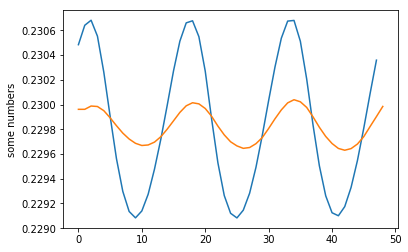

In [64]:
print(meanlist_noWindow)
import matplotlib.pyplot as plt
plt.plot(meanlist_noWindow)
plt.plot(meanlist_window)
plt.ylabel('some numbers')
plt.show()

 FCN=0.00171074 FROM MINOS     STATUS=SUCCESSFUL     41 CALLS        1451 TOTAL
                     EDM=3.34883e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant    -8.73670e+00   3.65043e+00   8.43425e-02   7.74227e-03
   2  Slope       -2.29083e+00   8.12980e+00   8.12980e+00   4.94180e-03
 FCN=2.4077 FROM MIGRAD    STATUS=CALL LIMIT   1489 CALLS        1490 TOTAL
                     EDM=0.000161386    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  14.8 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            6.72436e-03   1.54504e-02   1.43902e-04  -2.72677e+01
   2  Mean        -9.11716e-03   1.28903e-03   5.55817e-05  -1.91068e+00
   3  #gamma       9.29920e-04   2.20523e-03  -2.11344e-05  -1.90207e+02
   4  + C         

Warning in <Fit>: Abnormal termination of minimization.


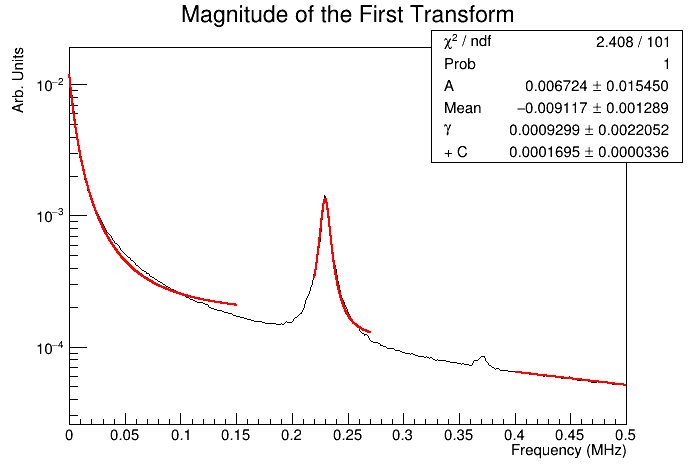

In [129]:
func2 = r.TF1("func2", peak_fit_bw, 0,.15,4)
func2.SetParNames('A','Mean','#gamma','+ C')
func2.SetParameters(.0001,.001,.1,0)
func2.SetParLimits(1,-0.1,0.1)
func2.SetLineColor(2)
func2.SetNpx(1000)

func3 = r.TF1("func3","expo",.4,.5)
h3.Fit("func3","REMB")

c = r.TCanvas()
c.SetLogy()
h3 = h.DrawClone()
h3.Draw("HIST P0 L")
h3.Fit("func2","REMB")
func2.Draw("SAME")
func.Draw("SAME")
func3.Draw("SAME")
c.Draw()

 FCN=0.168157 FROM MINOS     STATUS=SUCCESSFUL     82 CALLS        1967 TOTAL
                     EDM=6.48741e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.77708e-05   4.48575e-06   1.78595e-07  -5.40324e+02
   2  Mean         2.29873e-01   9.45511e-04   2.48118e-04  -5.34830e-03
   3  #gamma       9.19263e-03   3.33678e-03   1.26297e-04  -6.60904e-01
   4  + C          2.49870e-05   5.23595e-05   5.23595e-05   1.26509e-01


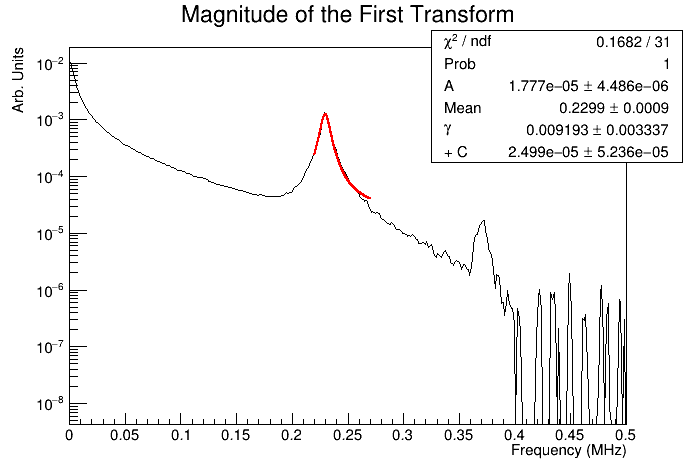

In [143]:
h4 = h.DrawClone()
c4 = r.TCanvas()
c4.SetLogy()

for i in range(0,h4.GetNbinsX()-2):
    bincenter = h4.GetBinCenter(i)
    bincontent = h4.GetBinContent(i)
    dong = bincontent - func3.Eval(bincenter)
    h4.SetBinContent(i,dong)

h4.Draw("HIST P0 L")
h4.Fit("func","REMB")
func.Draw("SAME")
c4.Draw()

 FCN=0.0179559 FROM MINOS     STATUS=PROBLEMS     1078 CALLS        2302 TOTAL
                     EDM=0.0114269    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.25466e-04   1.13861e-03  -1.93399e-07   2.11805e+02
   2  p1          -4.89270e+00   1.24243e+01   4.57763e-04   8.80192e-02
   3  p2          -8.28533e+00   8.74195e+01  -1.50762e-02  -3.72022e-05
   4  p3           3.17686e-05   8.20924e-05   8.20924e-05  -4.73702e-03


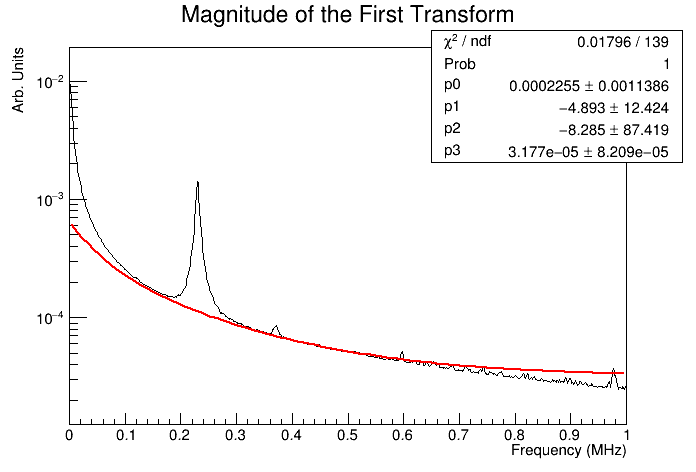

In [196]:
'''
Double_t fline(Double_t *x, Double_t *par)
{
    if (reject && x[0] > 2.5 && x[0] < 3.5) {
      TF1::RejectPoint();
      return 0;
   }
   return par[0] + par[1]*x[0];
}
'''
h4 = h.DrawClone()

reject = True

def fline(x, p):
    if(reject and not((x[0]>0.1 and x[0]<0.155) or (x[0]>0.30 and x[0]<0.35) or (x[0]>0.4 and x[0]<0.5) or (x[0]>0.6 and x[0]<3))):
        r.TF1.RejectPoint()
        return 0
    return p[0]*r.TMath.Exp(p[1]*x[0] + r.TMath.Exp(p[2]*x[0])) + p[3]

fl = r.TF1("fl",fline,0,3,4)
fl.SetParameters(0.0003,-0.4,-0.5,0)
h4.Fit(fl,"REMB")

reject = False

fl.SetParameter(2,-10.5)

c4 = r.TCanvas()
c4.SetLogy()

h4.GetXaxis().SetRangeUser(0,1)

h4.Draw("HIST P0 L")
fl.Draw("SAME")
c4.Draw()

 FCN=0.151778 FROM MINOS     STATUS=SUCCESSFUL     82 CALLS        2007 TOTAL
                     EDM=8.7826e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.74934e-05   4.43935e-06   1.70357e-07  -5.12409e+02
   2  Mean         2.29882e-01   9.44996e-04   2.49368e-04  -5.14088e-03
   3  #gamma       9.06803e-03   3.30652e-03   1.20608e-04  -6.34190e-01
   4  + C          1.15019e-04   5.20471e-05   5.20471e-05   1.35633e-01


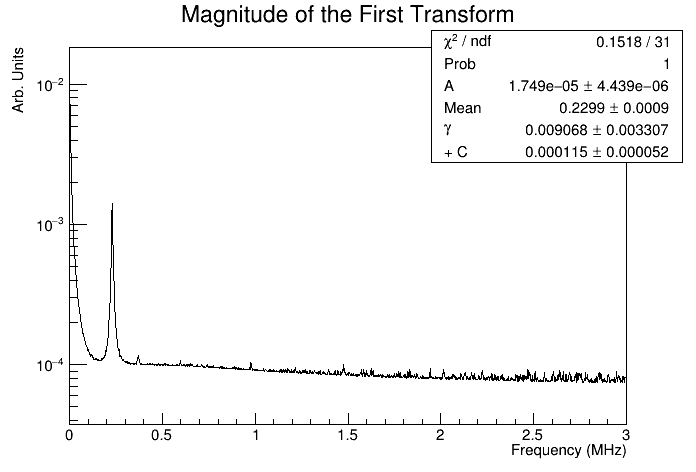

In [201]:
h5 = h.DrawClone()
c5 = r.TCanvas()
c5.SetLogy()

for i in range(0,h5.GetNbinsX()-2):
    bincenter = h5.GetBinCenter(i)
    bincontent = h5.GetBinContent(i)
    dong = bincontent - fl.Eval(bincenter)  + 0.0001
    h5.SetBinContent(i,dong)

h5.GetXaxis().SetRangeUser(0,3)
    
h5.Draw("HIST P0 L")
h5.Fit("func","REMB")
#func.Draw("SAME")
c5.Draw()

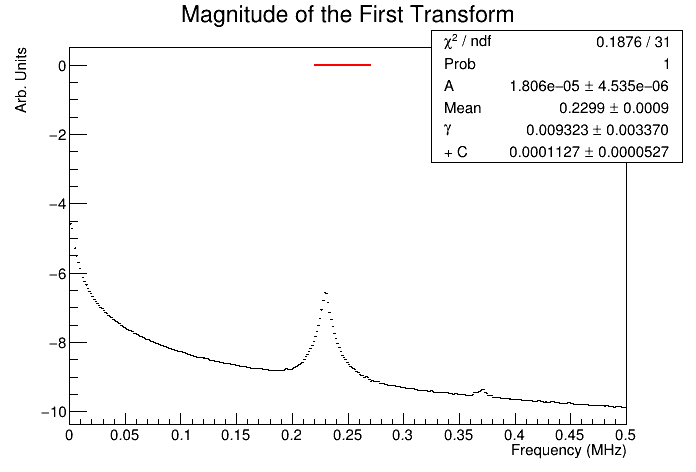

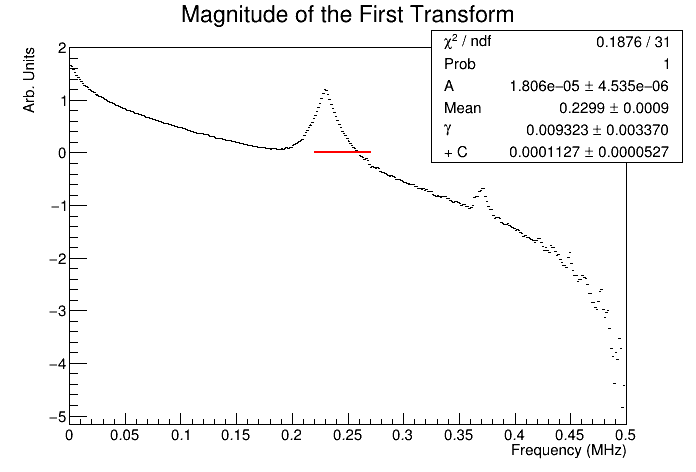

In [112]:
h2 = h.DrawClone()
c2 = r.TCanvas()
h2.Draw("HIST P0 L")
for i in range(0,h2.GetNbinsX()-2):
    ding = h2.GetBinContent(i)
    if ding>0:
        dong = np.log(ding)
    else:
        dong = 0
#    print(ding,dong)
    h2.SetBinContent(i,dong)
h2.DrawCopy()
c2.Draw()

offset = h2.GetBinContent(h2.GetMinimumBin())

c3 = r.TCanvas()
c3.cd()

for i in range(0,h2.GetNbinsX()-2):
    ding = h2.GetBinContent(i) - offset
    if ding>0:
        dong = np.log(ding)
    else:
        dong = 0
#    print(ding,dong)
    h2.SetBinContent(i,dong)

h2.Draw()
c3.Draw()